## 1.importance sampling

Z ~ N(0,1)
we are interested in the prob P(Z>4.5)
However,if we try to sample from N(0,1),the hit rate is very low.
So we try to sample from exponential distribution.

$g(y)=e^{-(y-4.5)}$

[4 2 2]
3.31148807703e-06


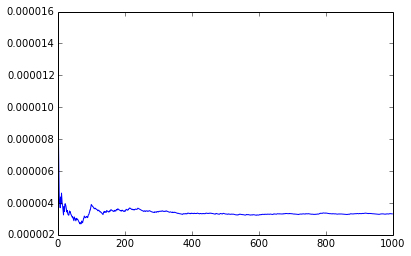

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
%matplotlib inline

Nsim=1000
y= np.random.exponential(1,size=1000)+4.5
weit = sp.norm.pdf(y,0,1)/np.exp(-(y-4.5))
print np.array([4,5,6])/np.array([1,2,3])
integral = np.cumsum(weit)/np.array(range(1,Nsim+1))

print integral[-1]
plt.plot(integral)
plt.show()

### 2 importance sampilng:2

Have an observation x from a beta distribution.

$x-B(\alpha,\beta)$

there exists a family of conjugate priors on ($\alpha$,$\beta$)

$\pi (\alpha,\beta)- (\lambda(\alpha+\beta))^{\lambda -1}x_0^{\alpha}y_0^{\beta}$

We want to sample from posterior distribution.
However,it is difficult.
So we use T-distiburtion as candidates.

Firstly, we try to calculate marginal likelihood m(x)

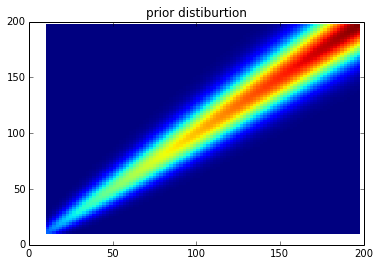

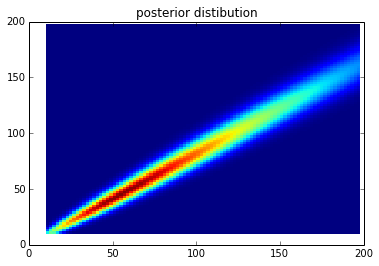

66.3625486226
0.508067205544


In [187]:
import scipy.special as sp
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## prior of alpha and beta
def mypi(a,b):
    return np.power(0.5,a+b)/sp.beta(a,b)
def mypipi(a,b):
    return np.exp(2*np.log(sp.gamma(a+b))-2*np.log(sp.gamma(a))-2*np.log(sp.gamma(b))+a*np.log(0.3)+b*np.log(0.2))

### candidate distribution
mu=np.array([50,45])
sigma = np.array([[220,190],[190,180]])
#####

candd = np.random.multivariate_normal(mu,sigma,size=10000)
cand =[]
for i in candd:
    if(i[0]>0 and i[1]>0):
        cand.append(i)
num1 = np.array([mypipi(i[0],i[1]) for i in cand])
num2 = np.array([mypi(i[0],i[1]) for i in cand])
num3 = np.array([i[0]*mypi(i[0],i[1]) for i in cand])
den = np.array([st.multivariate_normal.pdf(i,mu,sigma) for i in cand])

##print cand
##print num1
##print num2
###print den

x=np.arange(10,200,2)
y=np.arange(10,200,2)
X,Y = np.meshgrid(x,y)
Z = mypi(X,Y)
plt.pcolor(X,Y,Z)
plt.title("prior distiburtion")
plt.show()
plt.title("posterior distibution")
Z=np.array([mypi(i,j)*st.beta.pdf(0.6,i,j) for i,j in zip(X,Y)])
plt.pcolor(X,Y,Z)
plt.show()
    
num=[]
deno=[]

print np.mean(num3/den)/np.mean(num2/den)

for i,j in zip(num1/den,num2/den):
    if( i!=float("inf")):
        num.append(i)
        deno.append(j)
### answer
print np.mean(np.array(num))/np.mean(np.array(deno))